In [1]:
import matplotlib.pyplot as plt
import numpy as np

Heun's method responds to Euler's method by using derivative information at both the start and end of the interval:

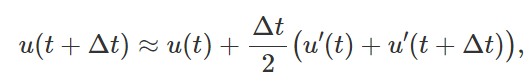

This requires knowledge of **u(t + dt)** to calculate the final term in the equation, which we don't know. 
So, we need to use a first guess at **x(t + dt)** using Euler's method:

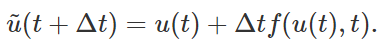

We can then plug this first estimate of u(t + dt) into the equation using:
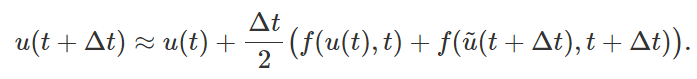

In [9]:
def euler(f, u0, t0, t_max, dt):
    u=u0, t=t0, u_all=[u0], t_all=[t0],
    while t<t_max:
        u = u + dt*f(u,t) 
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all, t_all)

def heun(f, u0, t0, t_max, dt):
    u=u0, t=t0, u_all=[u0], t_all=[t0]
    while t<t_max:
        ue = u + dt*f(u,t) #euler first guess
        u = u + 0.5*dt*(f(u,t) + f(ue,t+dt))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all, t_all)

def f1(u, t):
    val = u
    return val

def f2(u, t):
    val = np.cos(u)
    return val

**Plotting a comparison of Euler and Heun methods**

ValueError: not enough values to unpack (expected 2, got 1)

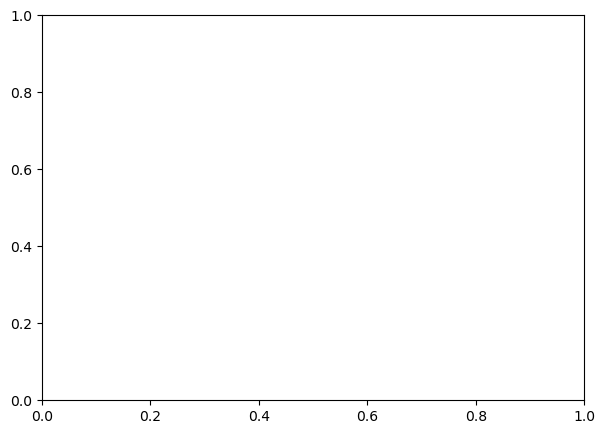

In [10]:
dt = 0.4
u0 = 1.0
t0 = 0.0
tf = 10.0

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

u_all,t_all = euler(f1,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'b',label='euler')

(u_all,t_all) = heun(f1,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'r',label='heun')

# exact solution
ax1.plot(t_all, np.exp(t_all),'k',label='exact')

ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel('u(t)', fontsize=14)
ax1.grid(True)
ax1.legend(loc='best')

plt.show()